In [1]:
 #%%

# google colab configurations 
# these might change
DATA_GENERATION = '13kwW8C01etWsqTYoE2eeFlD4Ft9YVhrw'
DATA_GENERATION_FILE = 'datageneration.py'

HELPERS = '1zskLM0-ZtEQYVI7zvd2ePqtkTOkJmVIL'
HELPERS_FILE = 'helpers.py'

EXPERIMENT = '1OrYHcTvUXHOrg-86_6oWaN2muDpuzn9a'
EXPERIMENT_FILE = 'experiment.py'

NETWORK = '1iFbCIY8IMaqO4I8mu2J7ie7UDJsLGtRv'
NETWORK_FILE = 'networks.py'

MODEL_CONFIG = '14OF6o1luI8u10Nq96FLBP1M1k-VvQKq-'
MODEL_CONFIG_FILE ='config.json'

HYPER_CONFIG = '1VWlMZnDhE9yhtBi5LrjZoZjTE6nmXsuk'
HYPER_CONFIG_FILE ='hyperparameter_tuning.json'

TUNER = '1I1K9whIpWvzWYjJQjfHLLrE9GXCuRbb1'
TUNER_FILE = 'param_tuner.py'

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    datageneration = drive.CreateFile({'id':DATA_GENERATION})
    datageneration.GetContentFile(DATA_GENERATION_FILE)
    

    helpers = drive.CreateFile({'id':HELPERS})
    helpers.GetContentFile(HELPERS_FILE)

    network = drive.CreateFile({'id':NETWORK})
    network.GetContentFile(NETWORK_FILE)

    experiment = drive.CreateFile({'id':EXPERIMENT})
    experiment.GetContentFile(EXPERIMENT_FILE)

    model_json = drive.CreateFile({'id':MODEL_CONFIG})
    model_json.GetContentFile(MODEL_CONFIG_FILE)

    hyper_json = drive.CreateFile({'id':HYPER_CONFIG})
    hyper_json.GetContentFile(HYPER_CONFIG_FILE)

    param_tuner = drive.CreateFile({'id':TUNER})
    param_tuner.GetContentFile(TUNER_FILE)
    


Running on Colab?
yes


In [0]:
# custom imports
from experiment import Experiment
from datageneration import DataGenerator
from helpers import Helper
# torch imports
import torch

# import utils
import json
from datetime import date
import os

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_director = ''
else:
    config_director = 'configs/'

with open(f'{config_director}config.json') as f:
    file = f.read()
    default_conf = json.loads(file)



In [0]:
CONFIGURATION='paper_configuration'

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf[CONFIGURATION]['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf[CONFIGURATION]['experiment_params']['train_on_gpu'] = False

Training on GPU!


## Generating a dataset

In [0]:
datagenerator = DataGenerator(default_conf[CONFIGURATION]['experiment_params']['dimx'],
                              default_conf[CONFIGURATION]['experiment_params']['dimy'],
                              default_conf[CONFIGURATION]['experiment_params']['range_x'],
                              default_conf[CONFIGURATION]['experiment_params']['dim_observation']
                              )
trainloader = Helper.create_loader(datagenerator,
                     default_conf[CONFIGURATION]['data_gen_params']['num_instances_train'],
                     default_conf[CONFIGURATION]['data_gen_params']['noise'],
                     default_conf[CONFIGURATION]['data_gen_params']['length_scale'],
                     default_conf[CONFIGURATION]['data_gen_params']['gamma'],
                     default_conf[CONFIGURATION]['data_gen_params']['batch_size_train'])

valiloader = Helper.create_loader(datagenerator,
                     default_conf[CONFIGURATION]['data_gen_params']['num_instances_vali'],
                     default_conf[CONFIGURATION]['data_gen_params']['noise'],
                     default_conf[CONFIGURATION]['data_gen_params']['length_scale'],
                     default_conf[CONFIGURATION]['data_gen_params']['gamma'],
                     default_conf[CONFIGURATION]['data_gen_params']['batch_size_vali'])

In [0]:
# creating an instance of to orchestrate the training
trainer = Experiment(**default_conf[CONFIGURATION]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 1.621604084968567
True
 Validation loss after 0 equals 1.2502577304840088


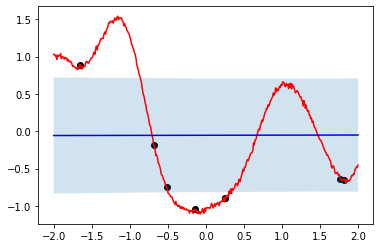

  2%|▏         | 4994/200000 [01:18<51:00, 63.71it/s]

Mean loss at epoch 5000 : 0.7601005434989929
True
 Validation loss after 5000 equals 0.7582593560218811


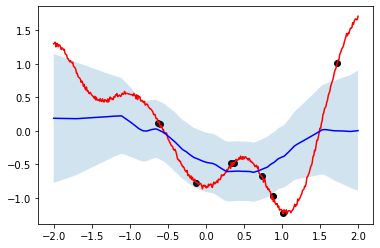

  5%|▍         | 9996/200000 [02:36<51:20, 61.68it/s]

Mean loss at epoch 10000 : 0.6766587495803833
True
 Validation loss after 10000 equals 1.001460075378418


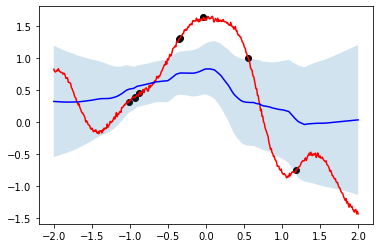

  7%|▋         | 14994/200000 [03:55<48:55, 63.02it/s]

Mean loss at epoch 15000 : 0.9419976472854614
True
 Validation loss after 15000 equals 0.9425420761108398


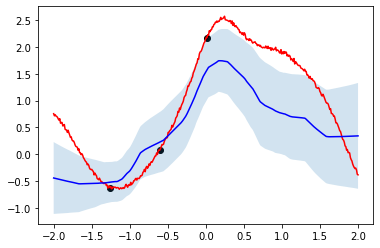

 10%|▉         | 19998/200000 [05:14<47:23, 63.31it/s]

Mean loss at epoch 20000 : 0.46698182821273804
True
 Validation loss after 20000 equals 0.7561853528022766


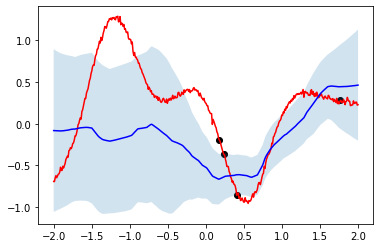

 12%|█▏        | 24996/200000 [06:33<46:09, 63.19it/s]

Mean loss at epoch 25000 : 0.6687344908714294
True
 Validation loss after 25000 equals 1.0755208730697632


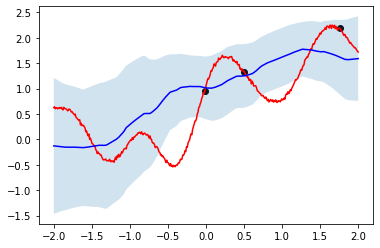

 15%|█▍        | 29998/200000 [07:53<44:11, 64.11it/s]

Mean loss at epoch 30000 : 0.6505810022354126
True
 Validation loss after 30000 equals 0.7852867245674133


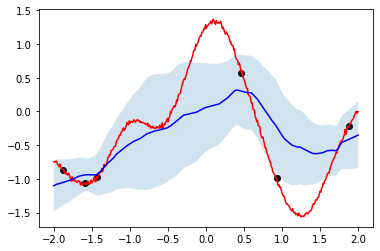

 17%|█▋        | 34995/200000 [09:12<42:49, 64.21it/s]

Mean loss at epoch 35000 : 0.30156460404396057
True
 Validation loss after 35000 equals 1.502179503440857


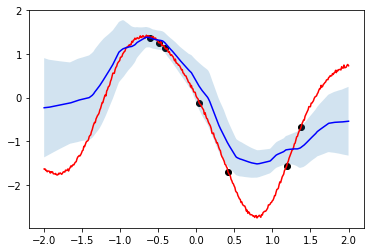

 20%|█▉        | 39998/200000 [10:31<41:43, 63.92it/s]

Mean loss at epoch 40000 : 0.25511592626571655
True
 Validation loss after 40000 equals 0.856749415397644


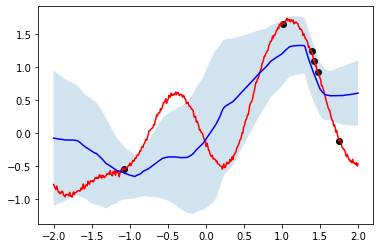

 22%|██▏       | 44995/200000 [11:50<40:46, 63.35it/s]

Mean loss at epoch 45000 : 0.7056447267532349
True
 Validation loss after 45000 equals 0.5785457491874695


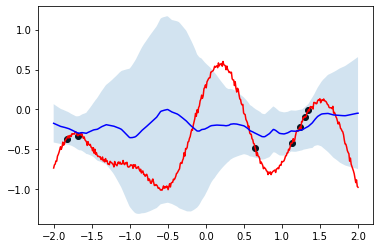

 25%|██▌       | 50000/200000 [13:10<38:24, 65.09it/s]

Mean loss at epoch 50000 : 0.49716347455978394
True
 Validation loss after 50000 equals 1.330704927444458


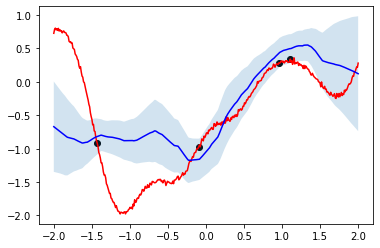

 27%|██▋       | 54996/200000 [14:28<37:37, 64.24it/s]

Mean loss at epoch 55000 : 0.6297087073326111
True
 Validation loss after 55000 equals 2.318141222000122


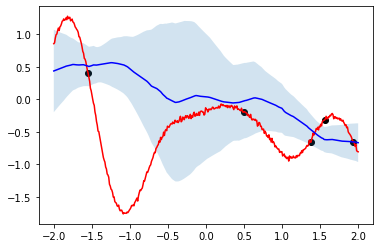

 30%|██▉       | 59999/200000 [15:47<36:43, 63.54it/s]

Mean loss at epoch 60000 : 0.7409164905548096
True
 Validation loss after 60000 equals 0.8888180255889893


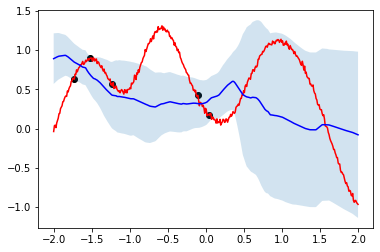

 32%|███▏      | 64997/200000 [17:06<34:42, 64.82it/s]

Mean loss at epoch 65000 : 0.5002947449684143
True
 Validation loss after 65000 equals 0.8438786268234253


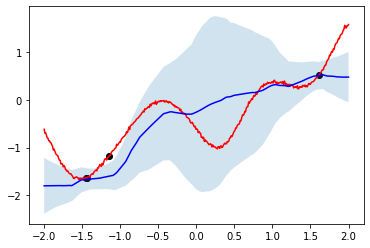

 35%|███▍      | 69997/200000 [18:25<34:18, 63.14it/s]

Mean loss at epoch 70000 : 1.1314386129379272
True
 Validation loss after 70000 equals 1.5578844547271729


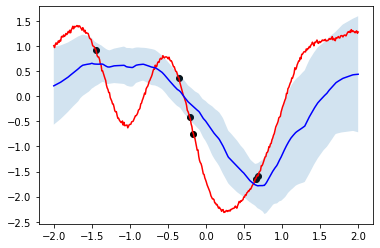

 37%|███▋      | 74999/200000 [19:43<33:07, 62.90it/s]

Mean loss at epoch 75000 : 0.1260392963886261
True
 Validation loss after 75000 equals 1.4321647882461548


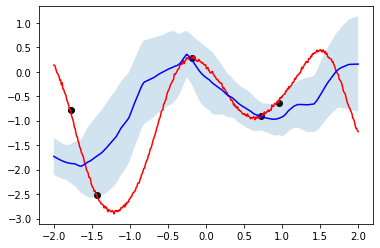

 40%|███▉      | 79997/200000 [21:02<32:55, 60.76it/s]

Mean loss at epoch 80000 : 0.47015440464019775
True
 Validation loss after 80000 equals 0.7930383682250977


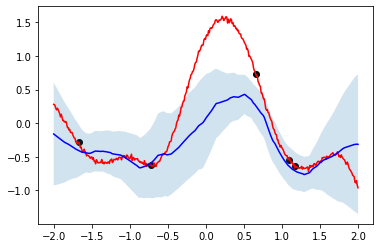

 42%|████▎     | 85000/200000 [22:21<30:33, 62.74it/s]

Mean loss at epoch 85000 : 0.24019283056259155
True
 Validation loss after 85000 equals 2.1919636726379395


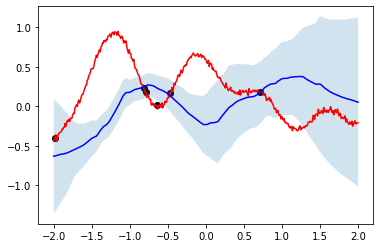

 45%|████▍     | 89997/200000 [23:40<28:52, 63.51it/s]

Mean loss at epoch 90000 : 0.5549936890602112
True
 Validation loss after 90000 equals 0.9927220940589905


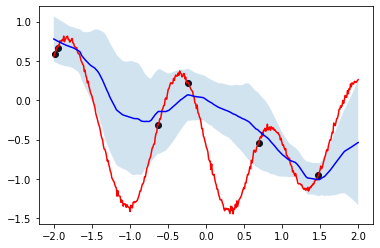

 47%|████▋     | 94995/200000 [24:58<28:03, 62.37it/s]

Mean loss at epoch 95000 : 0.24121899902820587
True
 Validation loss after 95000 equals 0.5900963544845581


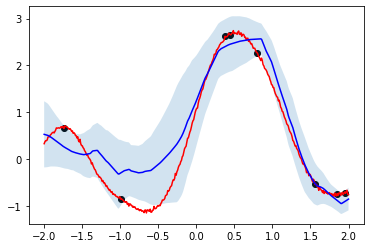

 50%|████▉     | 99995/200000 [26:18<26:24, 63.12it/s]

Mean loss at epoch 100000 : 0.7398676872253418
True
 Validation loss after 100000 equals 0.49462223052978516


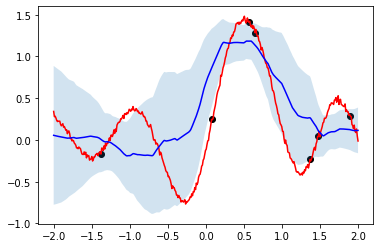

 52%|█████▎    | 105000/200000 [27:37<24:53, 63.60it/s]

Mean loss at epoch 105000 : 0.35292869806289673
True
 Validation loss after 105000 equals 0.8610098361968994


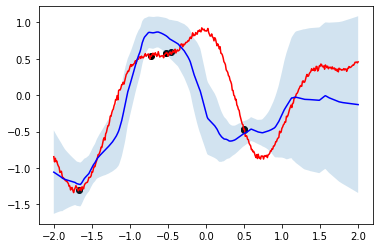

 55%|█████▍    | 109994/200000 [28:56<24:02, 62.38it/s]

Mean loss at epoch 110000 : 0.43084418773651123
True
 Validation loss after 110000 equals 0.6080150008201599


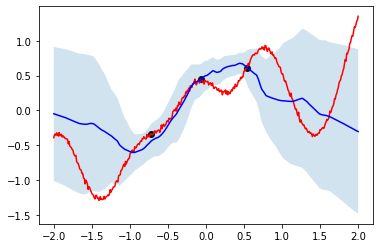

 57%|█████▋    | 114999/200000 [30:15<21:26, 66.07it/s]

Mean loss at epoch 115000 : 0.4161822199821472
True
 Validation loss after 115000 equals 0.9133866429328918


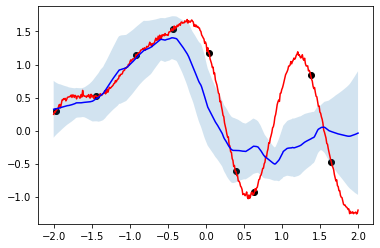

 60%|█████▉    | 119999/200000 [31:36<21:13, 62.83it/s]

Mean loss at epoch 120000 : 0.49490559101104736
True
 Validation loss after 120000 equals 1.7420306205749512


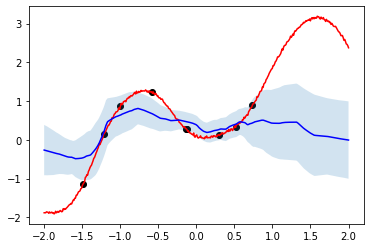

 62%|██████▎   | 125000/200000 [32:56<20:49, 60.05it/s]

Mean loss at epoch 125000 : 0.7274494171142578
True
 Validation loss after 125000 equals 0.352735310792923


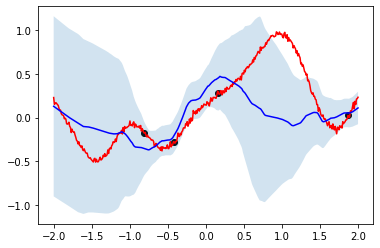

 65%|██████▌   | 130000/200000 [34:16<18:37, 62.62it/s]

Mean loss at epoch 130000 : 0.32298240065574646
True
 Validation loss after 130000 equals 0.380856990814209


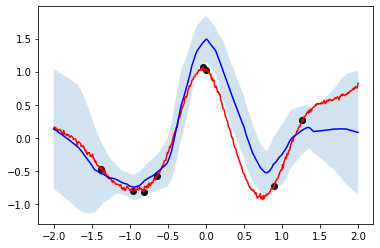

 67%|██████▋   | 134997/200000 [35:36<17:00, 63.70it/s]

Mean loss at epoch 135000 : 0.3373761773109436
True
 Validation loss after 135000 equals 0.3594074249267578


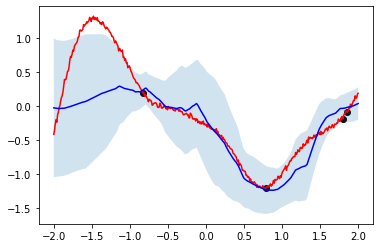

 70%|██████▉   | 139997/200000 [36:56<15:54, 62.87it/s]

Mean loss at epoch 140000 : 0.9035614728927612
True
 Validation loss after 140000 equals 1.66562020778656


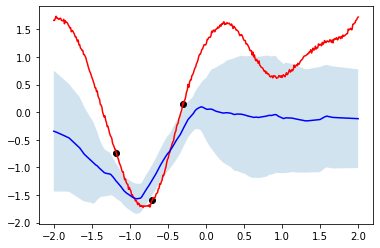

 72%|███████▏  | 144995/200000 [38:15<14:13, 64.44it/s]

Mean loss at epoch 145000 : 0.5043317675590515
True
 Validation loss after 145000 equals 2.611459493637085


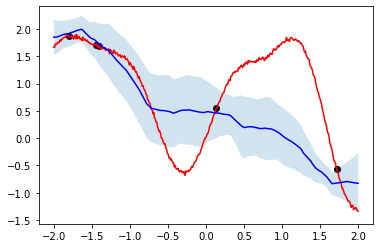

 75%|███████▍  | 149994/200000 [39:34<13:19, 62.54it/s]

Mean loss at epoch 150000 : 0.4800952970981598
True
 Validation loss after 150000 equals 0.25057587027549744


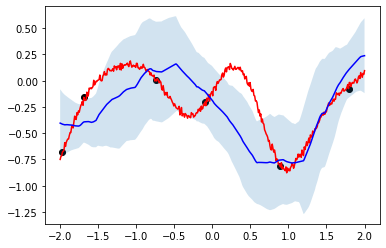

 77%|███████▋  | 154999/200000 [40:52<11:32, 64.94it/s]

Mean loss at epoch 155000 : 0.550400972366333
True
 Validation loss after 155000 equals 1.4780302047729492


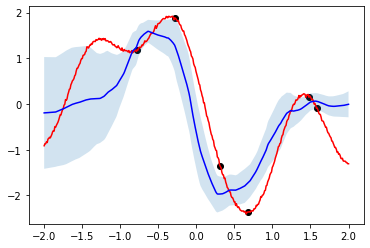

 80%|███████▉  | 159996/200000 [42:11<10:25, 64.00it/s]

Mean loss at epoch 160000 : 0.31267380714416504
True
 Validation loss after 160000 equals 0.5434765219688416


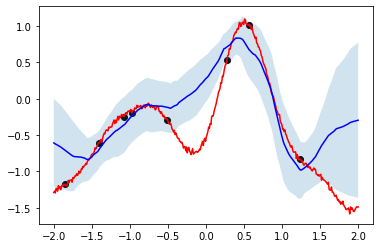

 82%|████████▏ | 164999/200000 [43:30<09:05, 64.18it/s]

Mean loss at epoch 165000 : 0.3185615539550781
True
 Validation loss after 165000 equals 0.5667130947113037


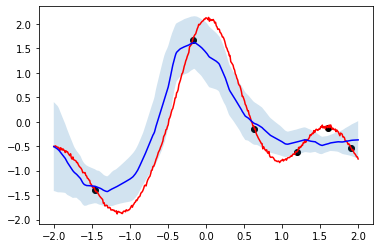

 85%|████████▍ | 169996/200000 [44:48<07:51, 63.61it/s]

Mean loss at epoch 170000 : 0.5008952617645264
True
 Validation loss after 170000 equals 0.10541633516550064


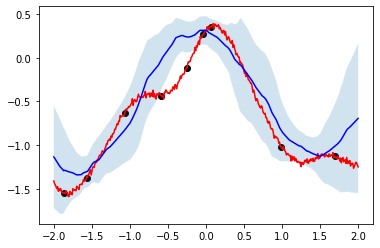

 88%|████████▊ | 175000/200000 [46:07<06:29, 64.14it/s]

Mean loss at epoch 175000 : 0.4797970652580261
True
 Validation loss after 175000 equals 0.6450571417808533


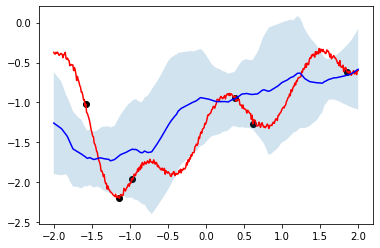

 90%|████████▉ | 179998/200000 [47:26<05:20, 62.37it/s]

Mean loss at epoch 180000 : 0.2281378209590912
True
 Validation loss after 180000 equals 0.792725682258606


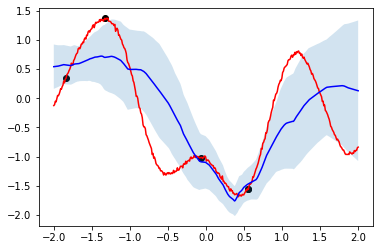

 92%|█████████▏| 184998/200000 [48:45<03:52, 64.46it/s]

Mean loss at epoch 185000 : 0.5287196636199951
True
 Validation loss after 185000 equals 1.2765921354293823


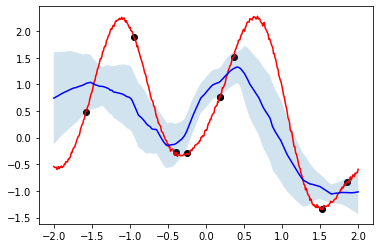

 95%|█████████▍| 189997/200000 [50:03<02:37, 63.56it/s]

Mean loss at epoch 190000 : 0.4369272291660309
True
 Validation loss after 190000 equals 0.5502857565879822


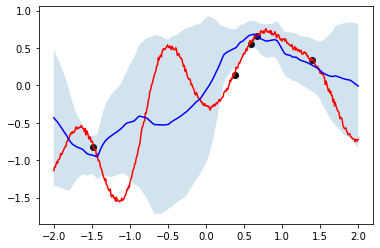

 97%|█████████▋| 194996/200000 [51:22<01:17, 64.70it/s]

Mean loss at epoch 195000 : 0.2641264796257019
True
 Validation loss after 195000 equals 0.738049328327179


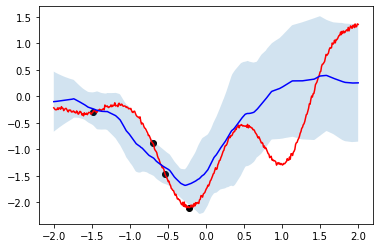

100%|██████████| 200000/200000 [52:40<00:00, 63.27it/s]


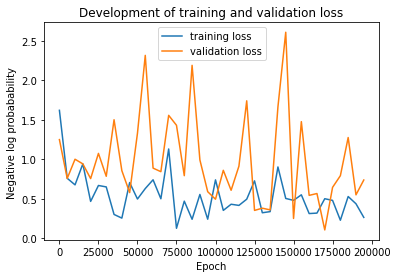

In [8]:
model_weights = trainer.run_training(**default_conf[CONFIGURATION]['data_gen_params'], valiloader=None, plotting=True)